In [1]:
#Don't forget to save your work to your local computer and push to GitHub.
#File -> Download as -> Notebook
#Move file from download folder to local repo clone
#git add filename.ipynb
#git commit -m "put a specific and informative message here of what you worked on"
#git push

# Importing the Data From All of Us

## Importing the Birth data

Note that data from *All of Us* is being imported into *Final_Birth_Concept_Set_for_Import* and cleaned there,
so the import takes some time (about 2 mins)

In [2]:
# As needed (i.e. once)
!pip install import-ipynb


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


importing Jupyter notebook from Final_Birth_Concept_Set_for_Import.ipynb


Downloading:   0%|          | 0/390805 [00:00<?, ?rows/s]

<bound method DataFrame.info of         person_id       standard_concept_name  condition_start_datetime
0         2026785  Gestation period, 16 weeks 2018-01-25 10:27:14+00:00
1         5944559  Gestation period, 16 weeks 2020-05-21 03:48:21+00:00
2         1655212  Gestation period, 16 weeks 2018-09-04 05:59:59+00:00
3         1647538  Gestation period, 16 weeks 2021-01-27 05:59:59+00:00
4         1108528  Gestation period, 16 weeks 2017-12-05 05:59:59+00:00
...           ...                         ...                       ...
390800    1360321   Third trimester pregnancy 2019-10-01 09:29:00+00:00
390801    3940829   Third trimester pregnancy 2021-09-09 13:38:00+00:00
390802    2568781   Third trimester pregnancy 2019-08-02 14:20:00+00:00
390803    2814607   Third trimester pregnancy 2022-03-16 15:04:00+00:00
390804    1698477   Third trimester pregnancy 2017-10-23 13:54:00+00:00

[390805 rows x 3 columns]>


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


<bound method DataFrame.info of         person_id       standard_concept_name  condition_start_datetime  \
0         2026785  Gestation period, 16 weeks 2018-01-25 10:27:14+00:00   
1         5944559  Gestation period, 16 weeks 2020-05-21 03:48:21+00:00   
2         1655212  Gestation period, 16 weeks 2018-09-04 05:59:59+00:00   
3         1647538  Gestation period, 16 weeks 2021-01-27 05:59:59+00:00   
4         1108528  Gestation period, 16 weeks 2017-12-05 05:59:59+00:00   
...           ...                         ...                       ...   
173722    3130259           Single live birth 2011-10-26 10:02:00+00:00   
173723    1520199           Single live birth 2013-07-26 23:51:00+00:00   
173724    3057825           Single live birth 2019-07-16 18:00:00+00:00   
173725    3051190           Single live birth 2011-11-22 05:00:00+00:00   
173726    1907658           Single live birth 2013-01-15 07:06:00+00:00   

       condition_start_date  
0                2018-01-25  
1      

Final_Birth_Concept_Set_for_Import.ipynb:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "execution_count": 1,


Entries removed: 5711
Entries kept: 15601
Statistics for Term:
          person_id  gestational_age_at_birth   birth_order
count  1.343400e+04              13434.000000  13434.000000
mean   2.958510e+06                 38.841638      1.276165
std    2.116125e+06                  1.067879      0.530288
min    1.000131e+06                 37.000000      1.000000
25%    1.565325e+06                 38.000000      1.000000
50%    2.200748e+06                 39.000000      1.000000
75%    3.260879e+06                 40.000000      1.000000
max    9.998770e+06                 44.000000      5.000000

Statistics for Preterm:
          person_id  gestational_age_at_birth  birth_order
count  2.167000e+03               2167.000000  2167.000000
mean   2.857171e+06                 33.389149     1.228426
std    2.002075e+06                  3.381602     0.488997
min    1.001034e+06                 22.000000     1.000000
25%    1.559583e+06                 32.000000     1.000000
50%    2.174813e+0

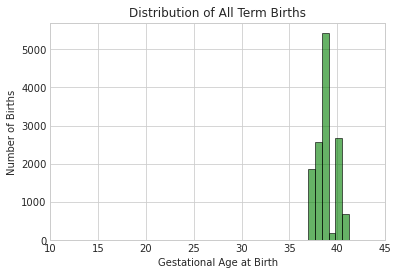

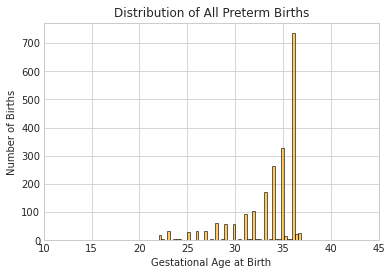

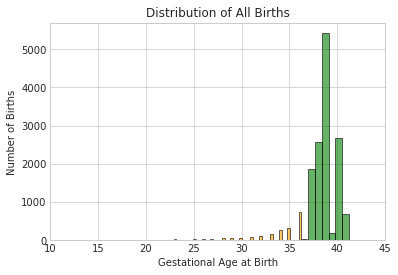

In [8]:
import import_ipynb
from Final_Birth_Concept_Set_for_Import import *

## Importing the *Person* data

In [1]:
import pandas
import os

# This query represents dataset "AS_KG_Dataset" for domain "person" and was generated for All of Us Controlled Tier Dataset v7
dataset_30352193_person_sql = """
    SELECT
        person.person_id,
        person.gender_concept_id,
        p_gender_concept.concept_name as gender,
        person.birth_datetime as date_of_birth,
        person.race_concept_id,
        p_race_concept.concept_name as race,
        person.ethnicity_concept_id,
        p_ethnicity_concept.concept_name as ethnicity,
        person.sex_at_birth_concept_id,
        p_sex_at_birth_concept.concept_name as sex_at_birth 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.person` person 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_gender_concept 
            ON person.gender_concept_id = p_gender_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_race_concept 
            ON person.race_concept_id = p_race_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_ethnicity_concept 
            ON person.ethnicity_concept_id = p_ethnicity_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_sex_at_birth_concept 
            ON person.sex_at_birth_concept_id = p_sex_at_birth_concept.concept_id  
    WHERE
        person.PERSON_ID IN (
            SELECT
                distinct person_id  
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
            WHERE
                cb_search_person.person_id IN (
                    SELECT
                        criteria.person_id 
                    FROM
                        (SELECT
                            DISTINCT person_id,
                            entry_date,
                            concept_id 
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                        WHERE
                            (
                                concept_id IN (
                                    SELECT
                                        DISTINCT c.concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                    JOIN
                                        (
                                            select
                                                cast(cr.id as string) as id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                            WHERE
                                                concept_id IN (36712702, 45757176, 4014295) 
                                                AND full_text LIKE '%_rank1]%'
                                        ) a 
                                            ON (
                                                c.path LIKE CONCAT('%.',
                                            a.id,
                                            '.%') 
                                            OR c.path LIKE CONCAT('%.',
                                            a.id) 
                                            OR c.path LIKE CONCAT(a.id,
                                            '.%') 
                                            OR c.path = a.id) 
                                        WHERE
                                            is_standard = 1 
                                            AND is_selectable = 1
                                        ) 
                                        AND is_standard = 1 
                                )
                            ) criteria 
                        ) )  
                    AND (person.PERSON_ID IN (SELECT
                        DISTINCT person_id  
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` 
                    WHERE
                        has_ehr_data = 1))"""

dataset_30352193_person_df = pandas.read_gbq(
    dataset_30352193_person_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

#dataset_30352193_person_df.head(5)

Downloading:   0%|          | 0/17524 [00:00<?, ?rows/s]

## Importing the *Zip Code* data

In [2]:
import pandas
import os

# This query represents dataset "AS_KG_Dataset" for domain "zip_code_socioeconomic" and was generated for All of Us Controlled Tier Dataset v7
dataset_30352193_zip_code_socioeconomic_sql = """
    SELECT
        observation.person_id,
        observation.observation_datetime,
        zip_code.zip3_as_string as zip_code,
        zip_code.fraction_assisted_income as assisted_income,
        zip_code.fraction_high_school_edu as high_school_education,
        zip_code.median_income,
        zip_code.fraction_no_health_ins as no_health_insurance,
        zip_code.fraction_poverty as poverty,
        zip_code.fraction_vacant_housing as vacant_housing,
        zip_code.deprivation_index,
        zip_code.acs as american_community_survey_year 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.zip3_ses_map` zip_code 
    JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.observation` observation 
            ON CAST(SUBSTR(observation.value_as_string,
        0,
        STRPOS(observation.value_as_string,
        '*') - 1) AS INT64) = zip_code.zip3  
    WHERE
        observation.PERSON_ID IN (
            SELECT
                distinct person_id  
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
            WHERE
                cb_search_person.person_id IN (
                    SELECT
                        criteria.person_id 
                    FROM
                        (SELECT
                            DISTINCT person_id,
                            entry_date,
                            concept_id 
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                        WHERE
                            (
                                concept_id IN (
                                    SELECT
                                        DISTINCT c.concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                    JOIN
                                        (
                                            select
                                                cast(cr.id as string) as id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                            WHERE
                                                concept_id IN (36712702, 45757176, 4014295) 
                                                AND full_text LIKE '%_rank1]%'
                                        ) a 
                                            ON (
                                                c.path LIKE CONCAT('%.',
                                            a.id,
                                            '.%') 
                                            OR c.path LIKE CONCAT('%.',
                                            a.id) 
                                            OR c.path LIKE CONCAT(a.id,
                                            '.%') 
                                            OR c.path = a.id) 
                                        WHERE
                                            is_standard = 1 
                                            AND is_selectable = 1
                                        ) 
                                        AND is_standard = 1 
                                )
                            ) criteria 
                        ) ) 
                    AND observation_source_concept_id = 1585250 
                    AND observation.value_as_string NOT LIKE 'Res%'"""

dataset_30352193_zip_code_socioeconomic_df = pandas.read_gbq(
    dataset_30352193_zip_code_socioeconomic_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

#dataset_30352193_zip_code_socioeconomic_df.head(5)

Downloading:   0%|          | 0/17517 [00:00<?, ?rows/s]

## Importing the *BMI* data

In [3]:
import pandas
import os

# This query represents dataset "BMI Dataset" for domain "measurement" and was generated for All of Us Controlled Tier Dataset v7
dataset_92747408_measurement_sql = """
    SELECT
        measurement.person_id,
        m_standard_concept.concept_name as standard_concept_name,
        measurement.measurement_datetime,
        measurement.value_as_number 
    FROM
        ( SELECT
            * 
        FROM
            `""" + os.environ["WORKSPACE_CDR"] + """.measurement` measurement 
        WHERE
            (
                measurement_source_concept_id IN  (
                    SELECT
                        DISTINCT c.concept_id 
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                    JOIN
                        (
                            select
                                cast(cr.id as string) as id 
                            FROM
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                            WHERE
                                concept_id IN (
                                    903124
                                ) 
                                AND full_text LIKE '%_rank1]%'
                        ) a 
                            ON (
                                c.path LIKE CONCAT('%.',
                            a.id,
                            '.%') 
                            OR c.path LIKE CONCAT('%.',
                            a.id) 
                            OR c.path LIKE CONCAT(a.id,
                            '.%') 
                            OR c.path = a.id) 
                        WHERE
                            is_standard = 0 
                            AND is_selectable = 1
                        )
                )  
                AND (
                    measurement.PERSON_ID IN (
                        SELECT
                            distinct person_id  
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
                        WHERE
                            cb_search_person.person_id IN (
                                SELECT
                                    criteria.person_id 
                                FROM
                                    (SELECT
                                        DISTINCT person_id,
                                        entry_date,
                                        concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                    WHERE
                                        (
                                            concept_id IN (
                                                SELECT
                                                    DISTINCT c.concept_id 
                                                FROM
                                                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                                JOIN
                                                    (
                                                        select
                                                            cast(cr.id as string) as id 
                                                        FROM
                                                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                                        WHERE
                                                            concept_id IN (36712702, 45757176, 4014295) 
                                                            AND full_text LIKE '%_rank1]%'
                                                    ) a 
                                                        ON (
                                                            c.path LIKE CONCAT('%.',
                                                        a.id,
                                                        '.%') 
                                                        OR c.path LIKE CONCAT('%.',
                                                        a.id) 
                                                        OR c.path LIKE CONCAT(a.id,
                                                        '.%') 
                                                        OR c.path = a.id) 
                                                    WHERE
                                                        is_standard = 1 
                                                        AND is_selectable = 1
                                                    ) 
                                                    AND is_standard = 1 
                                            )
                                        ) criteria 
                                    ) 
                                    AND cb_search_person.person_id IN (
                                        SELECT
                                            criteria.person_id 
                                        FROM
                                            (SELECT
                                                DISTINCT person_id,
                                                entry_date,
                                                concept_id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                            WHERE
                                                (
                                                    concept_id IN (903124) 
                                                    AND is_standard = 0 
                                                )) criteria ) 
                                    )
                                )) measurement 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_standard_concept 
                                ON measurement.measurement_concept_id = m_standard_concept.concept_id"""

dataset_92747408_measurement_df = pandas.read_gbq(
    dataset_92747408_measurement_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

# dataset_92747408_measurement_df.head(5)

Downloading:   0%|          | 0/16016 [00:00<?, ?rows/s]

# Combining each data frame into a single data frame

## Importing needed packages

In [6]:
import pandas as pd

## Renaming individual data frames and dropping columns we don't need

In [186]:
# condition_df

condition_df = final_birth_data



# person_df

person_df_drop_columns = ['gender_concept_id', 'race_concept_id', 'ethnicity_concept_id', 'sex_at_birth_concept_id']

person_df = dataset_30352193_person_df.drop(columns=person_df_drop_columns)



# zip_df

# note this wikipedia list of zip_code prefixes (i.e. first 3 digits):
# https://en.wikipedia.org/wiki/List_of_ZIP_Code_prefixes

zip_df = dataset_30352193_zip_code_socioeconomic_df




# bmi_df

bmi_df_drop_columns = ['standard_concept_name', 'measurement_datetime']

bmi_df = dataset_92747408_measurement_df.drop(columns=bmi_df_drop_columns)

## Finding common values of *person_id* and restricting data frames to rows with common values

In [187]:
# create a dictionary of values of person_id and multiplicities in each data frame

## start by creating sets of unique ids

unique_ids_condition = list(condition_df.person_id.unique())
unique_ids_person = list(person_df.person_id.unique())
unique_ids_zip = list(zip_df.person_id.unique())
unique_ids_bmi = list(bmi_df.person_id.unique())

In [188]:
## create a set of values of person_id that occur in each data frame
## we then sort common_ids in ascending order

## since we only have four data frames, easy to construct full hierarchy, if we want

common_ids = []

for pid in unique_ids_condition:
    if (pid in unique_ids_person) and (pid in unique_ids_zip) and (pid in unique_ids_bmi):
        common_ids.append(pid)

common_ids.sort()

In [189]:
## restrict data frames to rows with personal_id values in common_ids
## Also, we sort by person_id

## For restricted condition, we primarily sort by person_id, but
## for each value of person_id, we then sort by birth order

restricted_condition = condition_df[condition_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id", "birth_order"])
restricted_person = person_df[person_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id"])
restricted_zip = zip_df[zip_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id"])
restricted_bmi = bmi_df[bmi_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id"])

## Merging *restricted_person* and *restricted_zip*

In [190]:
## restricted_condition, restricted_person, and restricted_zip all have the same values of person_id occuring in them
## each value of person_id occurs only once in restricted_person and restricted_zip
## we start by simply merging restricted_person and restricted_zip along person_id

combined_df_half = pd.merge(restricted_person, restricted_zip, on='person_id')

## next, we rename the columns to identify which data frame they originally came from

person_zip_col_dict = {}

for col in restricted_person.columns:
    if col != 'person_id':
        person_zip_col_dict[col] = col+"_person"

for col in restricted_zip.columns:
    if col != 'person_id':
        person_zip_col_dict[col] = col+"_zip"

combined_df_half = combined_df_half.rename(columns=person_zip_col_dict)

## Merging *combined_df_half* and *restricted_bmi*

In [191]:
# check to see if restricted_bmi has multiple instances of any value of person_id

#bmi_dict = {}

#for pid in common_ids:
#    if pid in bmi_dict.keys():
#        bmi_dict[pid] += 1
#    else:
#        bmi_dict[pid] = 1

#bmi_max = max(bmi_dict.values())

#print(bmi_max)

# As of 14 Nov 2023, restricted_bmi has exactly one instance of every value of person_id in common_ids

In [192]:
combined_df_half = pd.merge(combined_df_half, restricted_bmi, on='person_id')

combined_df_half = combined_df_half.rename(columns={'value_as_number': 'BMI'})

## Adding the *condition* data

### We start by splitting up *restricted_condition* by *birth_order*

In [193]:
#KATIE CHANGED THIS NOV 15 by uncommenting multiple births
## Note that as of 11 Nov 2023, we see
## Everyone has a first birth
## 3127 out of 11952 have a second birth
## 467 out of 11952 have a third birth
## For run time concerns, we only include first and second births


first_birth = restricted_condition[restricted_condition['birth_order'] == 1].copy().sort_values(by=["person_id"])
second_birth = restricted_condition[restricted_condition['birth_order'] == 2].copy().sort_values(by=["person_id"])
third_birth = restricted_condition[restricted_condition['birth_order'] == 3].copy().sort_values(by=["person_id"])
fourth_birth = restricted_condition[restricted_condition['birth_order'] == 4].copy().sort_values(by=["person_id"])
fifth_birth = restricted_condition[restricted_condition['birth_order'] == 5].copy().sort_values(by=["person_id"])


### The following code was for establishing the "wide format" of our data. Keeping it around for now

In [194]:
## We now reset the indexing on second_birth to easily add our extra rows

##second_birth.reset_index(drop=True, inplace=True)

##last_index = second_birth.index.max()

##true_second_birthers = second_birth.person_id.tolist()

##for pid in common_ids:
##    if pid not in true_second_birthers:
##        last_index += 1
##        second_birth.loc[last_index] = [pid, None, None, None, 2]

##second_birth = second_birth.sort_values(by=["person_id"])

In [195]:
### We update the column names in *first_birth* and *second_birth* before merging and drop *birth_order*

##first_birth_dict = {}

##for col in first_birth.columns:
##    if col != 'person_id':
##        first_birth_dict[col] = "first_"+col
        
##second_birth_dict = {}

##for col in second_birth.columns:
##    if col != 'person_id':
##        second_birth_dict[col] = "second_"+col

##first_birth = first_birth.rename(columns=first_birth_dict)
##second_birth = second_birth.rename(columns=second_birth_dict)

##first_birth = first_birth.drop(columns=['first_birth_order'])
##second_birth = second_birth.drop(columns=['second_birth_order'])

### Next, use a loop to make the birth dataframes we will concatenate for combined_df

In [196]:
combined_df_half = combined_df_half.sort_values(by=["person_id"])

birth_dfs = [first_birth, second_birth, third_birth, fourth_birth, fifth_birth]

birth_dataframes = []

for i, birth_df in enumerate(birth_dfs, start=1):
    combined_df = combined_df_half.copy()
    birthers = birth_df.person_id.tolist()
    combined_df = combined_df[combined_df['person_id'].isin(birthers)].sort_values(by=["person_id"])
    combined_df = pd.merge(combined_df, birth_df, on='person_id')
    birth_dataframes.append(combined_df)

# Concatenate all birth dataframes
combined_df = pd.concat(birth_dataframes)


# Concatenate all birth dataframes
combined_df = pd.concat([globals()[f'combined_df_{i}_births'] for i in range(1, 6)])

# Sort and reset index
combined_df = combined_df.sort_values(by=["person_id", "birth_order"]).reset_index(drop=True)


combined_df.info

<bound method DataFrame.info of        person_id                                      gender_person  \
0        1000131  Not man only, not woman only, prefer not to an...   
1        1000195                                             Female   
2        1000724                                             Female   
3        1001000                                             Female   
4        1001034                                             Female   
...          ...                                                ...   
13685    9981792                                             Female   
13686    9982785                                             Female   
13687    9989602                                             Female   
13688    9989602                                             Female   
13689    9989602                                             Female   

           date_of_birth_person                race_person  \
0     2002-06-15 00:00:00+00:00                      

## The final data frame

### We rename the data frame as *birth* and add a copy of *birth_class* as a binary variable

In [199]:
birth = combined_df.copy()#.drop(columns=['index'])

birth['birth_class_binary'] = 0

birth.loc[birth.birth_class=='Preterm', 'birth_class_binary'] = 1


In [200]:
pd.options.display.max_columns = None
birth.head(8)

,person_id,gender_person,date_of_birth_person,race_person,ethnicity_person,sex_at_birth_person,observation_datetime_zip,zip_code_zip,assisted_income_zip,high_school_education_zip,median_income_zip,no_health_insurance_zip,poverty_zip,vacant_housing_zip,deprivation_index_zip,american_community_survey_year_zip,BMI,condition_start_date,birth_class,gestational_age_at_birth,birth_order,birth_class_binary
0,1000131,"Not man only, not woman only, prefer not to an...",2002-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2021-09-09 17:18:12+00:00,853**,13,85,"61,581",11,14,12,0,2017,36,2021-09-22,Term,39,1,0
1,1000195,Female,1982-06-15 00:00:00+00:00,Black or African American,Not Hispanic or Latino,Female,2019-04-15 19:33:14+00:00,104**,38,71,"39,407",11,30,6,0,2017,28,2021-08-10,Term,40,1,0
2,1000724,Female,1999-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2017-09-19 13:40:32+00:00,154**,21,88,"42,632",6,19,16,0,2017,41,2019-08-06,Term,40,1,0
3,1001000,Female,1999-06-15 00:00:00+00:00,Black or African American,Hispanic or Latino,Female,2020-02-13 18:47:27+00:00,927**,16,66,"69,333",17,17,3,0,2017,29,2018-11-09,Term,40,1,0
4,1001034,Female,1989-06-15 00:00:00+00:00,None of these,What Race Ethnicity: Race Ethnicity None Of These,Female,2019-05-17 18:48:39+00:00,850**,19,78,"54,223",17,22,10,0,2017,29,2017-06-28,Term,39,1,0
5,1001034,Female,1989-06-15 00:00:00+00:00,None of these,What Race Ethnicity: Race Ethnicity None Of These,Female,2019-05-17 18:48:39+00:00,850**,19,78,"54,223",17,22,10,0,2017,29,2019-06-29,Preterm,29,2,1
6,1001207,Female,1985-06-15 00:00:00+00:00,None Indicated,Hispanic or Latino,Female,2019-08-14 19:24:56+00:00,104**,38,71,"39,407",11,30,6,0,2017,28,2020-02-15,Term,40,1,0
7,1001211,Female,1984-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2020-03-06 18:13:48+00:00,852**,8,92,"74,084",10,12,11,0,2017,24,2016-09-19,Term,40,1,0


### Engineer age_at_birth from date_of_birth_person and condition_start_date


In [201]:
birth['date_of_birth_person'] = pd.to_datetime(birth['date_of_birth_person'])  

birth['date_of_birth_person'] = birth['date_of_birth_person'].dt.date

birth['date_of_birth_person'] = pd.to_datetime(birth['date_of_birth_person'])
birth['condition_start_date'] = pd.to_datetime(birth['condition_start_date'])

# Engineer the 'age_at_birth' feature
birth['age_at_birth'] = (birth['condition_start_date'] - birth['date_of_birth_person']).dt.days // 365.25  


### One-hot encode race and ethnicity

In [202]:
birth_encoded = pd.get_dummies(birth, columns=['race_person'], prefix='race')
birth_encoded = pd.get_dummies(birth_encoded, columns=['ethnicity_person'], prefix='ethnicity')

In [203]:
#column_sums = combined_df_encoded.sum()
#pd.set_option('display.float_format', '{:,.0f}'.format)
#print(column_sums)


### Remove columns that will not be used as features

In [204]:
birth.drop(['gender_person', 'sex_at_birth_person', 'observation_datetime_zip'], axis=1, inplace=True)
birth.drop(['zip_code_zip', 'american_community_survey_year_zip', 'birth_class'], axis=1, inplace=True)
birth.drop(['date_of_birth_person', 'ethnicity_person'], axis=1, inplace=True)

#### Nov 15th numbers - removing columns with very low counts for race and ethnicity?
race_Asian                                                               450
race_Black or African American                                         2,025
race_I prefer not to answer                                               85
race_Middle Eastern or North African                                     109
race_More than one population                                            346
race_Native Hawaiian or Other Pacific Islander                            35
race_None Indicated                                                    5,787
race_None of these                                                        94
race_PMI: Skip                                                           127
race_White                                                             4,632
ethnicity_Hispanic or Latino                                           6,352
ethnicity_Not Hispanic or Latino                                       7,032
ethnicity_PMI: Prefer Not To Answer                                       85
ethnicity_PMI: Skip                                                      127
ethnicity_What Race Ethnicity: Race Ethnicity None Of These               94

### Combine some one hot encoded variables

In [235]:
birth_encoded['race_no_answer'] = birth_encoded['race_PMI: Skip'] | birth_encoded['race_None Indicated'] | birth_encoded['race_I prefer not to answer']
birth_encoded['ethnicity_no_answer'] = birth_encoded['ethnicity_PMI: Prefer Not To Answer'] | birth_encoded['ethnicity_PMI: Skip']

# Drop the original dummy encoded columns plus uninformative 'race ethnicity none of these'
birth_encoded.drop(['race_PMI: Skip', 'race_None Indicated', 'race_I prefer not to answer', 'ethnicity_PMI: Prefer Not To Answer', 'ethnicity_PMI: Skip', 'ethnicity_What Race Ethnicity: Race Ethnicity None Of These'], axis=1, inplace=True)

KeyError: 'ethnicity_PMI: Prefer Not To Answer'

### Drop columns that will not be used as features

In [206]:
birth_encoded.drop(['gender_person', 'sex_at_birth_person', 'observation_datetime_zip'], axis=1, inplace=True)
birth_encoded.drop(['zip_code_zip', 'american_community_survey_year_zip'], axis=1, inplace=True)
birth_encoded.drop(['date_of_birth_person'], axis=1, inplace=True)


In [207]:
birth_encoded.sample(5)

,person_id,assisted_income_zip,high_school_education_zip,median_income_zip,no_health_insurance_zip,poverty_zip,vacant_housing_zip,deprivation_index_zip,BMI,condition_start_date,birth_class,gestational_age_at_birth,birth_order,birth_class_binary,age_at_birth,race_Asian,race_Black or African American,race_Middle Eastern or North African,race_More than one population,race_Native Hawaiian or Other Pacific Islander,race_None of these,race_White,ethnicity_Hispanic or Latino,ethnicity_Not Hispanic or Latino,race_no_answer,ethnicity_no_anwer
11299,3356547,38,71,"39,407",11,30,6,0,24,2017-12-15,Term,38,1,0,30,0,0,0,0,0,0,0,1,0,1,0
5748,1900283,13,85,"61,581",11,14,12,0,26,2022-05-13,Term,39,2,0,24,0,0,0,0,0,0,0,1,0,1,0
5014,1781823,13,85,"61,581",11,14,12,0,30,2017-01-19,Term,38,1,0,25,0,0,0,0,0,0,0,1,0,1,0
10078,2998218,13,85,"61,581",11,14,12,0,33,2021-06-04,Term,39,2,0,27,0,0,0,0,0,0,0,1,0,1,0
34,1005687,10,82,"79,894",11,13,4,0,24,2019-12-23,Term,40,1,0,30,0,0,0,0,0,0,0,1,0,1,0


### Check datatypes 

In [208]:
print(birth_encoded.dtypes)

person_id                                                  Int64
assisted_income_zip                                      float64
high_school_education_zip                                float64
median_income_zip                                        float64
no_health_insurance_zip                                  float64
poverty_zip                                              float64
vacant_housing_zip                                       float64
deprivation_index_zip                                    float64
BMI                                                      float64
condition_start_date                              datetime64[ns]
birth_class                                               object
gestational_age_at_birth                                 float64
birth_order                                                int64
birth_class_binary                                         int64
age_at_birth                                             float64
race_Asian               

### Add any additional code for standardization/normalization below...

### Rename birth_encoded df to birth

In [209]:
birth = birth_encoded.copy()

# Modeling

## Logisitic Regression

### Importing packages

In [210]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import recall_score, f1_score, precision_recall_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.metrics import precision_score
#from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE


### Train-test splits

Births worldwide are much more likey to be term births than preterm births; this is reflected in our data. Consequently, we will be using stratified splits.

Additionally, we are using multiple observations per person. To avoid using future data to predict the past, the *last* birth for each person will be reserved for the test set only. The training set may contain all births up to the last birth, including the first birth if it is the only birth.

### Mark births that are the last birth of multiples

In [212]:
import pandas as pd

# Assuming 'birth' DataFrame has columns 'person_id' and 'birth_order'

# Sort the DataFrame by 'person_id' and 'birth_order'
birth = birth.sort_values(by=['person_id', 'birth_order'])

# Identify the last birth in each group (person_id) with more than one birth
last_births = birth[birth.duplicated(subset='person_id', keep=False) & ~birth.duplicated(subset='person_id', keep='last')]

# Create a new column 'last_birth_of_multiples' and mark the identified last births as 1
birth['last_birth_of_multiples'] = 0
birth.loc[last_births.index, 'last_birth_of_multiples'] = 1

# Display the resulting DataFrame
print(birth[['person_id', 'birth_order', 'last_birth_of_multiples']])
print("Number of last births of multiples", birth['last_birth_of_multiples'].sum())

# Check the distribution of term and preterm in this set 
filtered_mutliples_df = birth[birth['last_birth_of_multiples'] == 1]
birth_class_percentage = filtered_mutliples_df['birth_class'].value_counts(normalize=True) * 100
print(birth_class_percentage)


       person_id  birth_order  last_birth_of_multiples
0        1000131            1                        0
1        1000195            1                        0
2        1000724            1                        0
3        1001000            1                        0
4        1001034            1                        0
...          ...          ...                      ...
13685    9981792            1                        0
13686    9982785            1                        0
13687    9989602            1                        0
13688    9989602            2                        0
13689    9989602            3                        1

[13690 rows x 3 columns]
Number of last births of multiples 2702
Term      88
Preterm   12
Name: birth_class, dtype: float64


In [213]:
# Include marked last births only in the test set
birth_test_data = birth[birth['last_birth_of_multiples'] == 1]

# Exclude last births of multiples from the dataset
birth_remaining = birth[birth['last_birth_of_multiples'] == 0]

# Reset the index for the resulting DataFrames
birth_test_data.reset_index(drop=True, inplace=True)
birth_remaining.reset_index(drop=True, inplace=True)


# Stratify the remaining births for inclusion in the training set
birth_train_data, birth_test_remaining = train_test_split(birth_remaining,
                                                          test_size=0.2,
                                                          shuffle=True,
                                                          random_state=404,
                                                          stratify=birth_remaining['birth_class'])


# Append last_birth_test_set to birth_test_remaining
birth_test_data = birth_test_remaining.append(birth_test_data)


# Reset the index for the resulting DataFrames
birth_train_data.reset_index(drop=True, inplace=True)
birth_test_data.reset_index(drop=True, inplace=True)


#### View dataframes to check that loop worked as expected

In [256]:
print("Birth Train Data:")
print(birth_train_data.head())
print("birth train unique vals", birth_train_data['birth_order'].unique())

print("\nBirth Test Data:")
print(birth_test_data.info())
print("birth test unique vals",birth_test_data['birth_order'].unique())

Birth Train Data:
   person_id  assisted_income_zip  high_school_education_zip  \
0    3357407                   19                         78   
1    1855389                   13                         94   
2    1844406                   10                         80   
3    2509963                   13                         85   
4    4269101                    8                         92   

   median_income_zip  no_health_insurance_zip  poverty_zip  \
0             54,223                       17           22   
1             60,081                        6           15   
2             70,509                       12           12   
3             61,581                       11           14   
4             74,084                       10           12   

   vacant_housing_zip  deprivation_index_zip  BMI condition_start_date  \
0                  10                      0   31           2018-07-28   
1                  10                      0   23           2019-02-24   
2 

#### Verifying train-test splits

In [262]:
# Count the unique values for birth_class in the training set
unique_values = birth_train_data['birth_class'].value_counts()
print(unique_values)

# Count the unique values for birth_class in the training set
unique_values = birth_test_data['birth_class'].value_counts()
print(unique_values)


Term       7516
Preterm    1274
Name: birth_class, dtype: int64
Term       4261
Preterm     639
Name: birth_class, dtype: int64
Actual: [0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 

### Early Data Analysis and Visualizations

In [29]:
'''
# We begin by making lists of categorical and continuous features

cat_feat = ['race_person', 'ethnicity_person', 'sex_at_birth_person', 'birth_order']

cont_feat = ['date_of_birth_person', 'observation_datetime_zip', 'assisted_income_zip',
            'high_school_education_zip', 'median_income_zip', 'no_health_insurance_zip', 'poverty_zip',
            'vacant_housing_zip', 'deprivation_index_zip', 'BMI', 'condition_start_date']

# Note that the following columns are our outcome or are used in directly
# computing our outcome, and thus aren't features:
# 'birth_class', 'gestational_age_at_birth', 'birth_class_binary'

# Additionally, zip_code_zip is partial zip code information.
# It is categorical, but we omit it from our model, as we
# are not confident that we have enough data for each
# category

# The following columns are immediately unhelpful:
# 'american_community_survey_year_zip' - all same year

# Need to decide if we want to use birth_order as a feature.
# When restricting to only first and second births, I think this is okay
# Would we rather drop it as a feature and include all births?
'''

#### Categorical Features

In [30]:
'''
# This is taking awhile to run, so I'm leaving it for now

# For our categorical features, we make swarm plots

for feat in cat_feat:
    plt.figure(figsize=(4,6))
    sns.swarmplot(data=birth_train,
               x = feat,
               y = 'birth_class',
            hue=feat,
            palette=['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'brown'],
            legend=False)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("birth_class", fontsize=12)

    plt.show()

# Not enough responses for gender_person, should drop
'''

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f65fba358c0> (for post_execute):


KeyboardInterrupt: 

#### Continuous Features

In [ ]:
'''
# For our continuous features, we begin by making histograms to see how well
# each continuous feature distinguishes term vs preterm

# Since there is such a big difference in total number of observed
# term vs preterm, I am creating different plots for each feature

for feat in cont_feat:
    plt.figure(figsize=(8,5))


    plt.hist(birth_train.loc[birth_train.birth_class_binary==0, feat].values,
                color='blue',
                alpha=.8,
                label="Preterm")

    plt.xlabel(feat, fontsize=14)
    plt.legend(fontsize=14)
    
    plt.figure(figsize=(8,5))

    plt.hist(birth_train.loc[birth_train.birth_class_binary==1, feat].values,
                color='orange',
                alpha=.4,
                hatch = '\\',
                edgecolor='black',
                label="Term")

    plt.xlabel(feat, fontsize=14)
    plt.legend(fontsize=14)

    plt.show()
'''

Not as interesting:
date_of_birth_person, observation_datetime, condition_start_date

Seem most interesting:
assisted_income_zip, median_income_zip, no_health_insurance_zip, vacant_housing_zip, deprivation_index_zip, BMI

### Training: Baseline Model

Based on our normalized value counts, our baseline model is a random coin flip with probability matching the likelihood of our term births (0.859).

In [255]:
# We create an ndarray of random binomial pulls with a probability of having 

baseline_obs = []

for obs in range(1000):
    draw = np.random.binomial(n=1,
                             p=0.859,
                             size=len(birth_train_data))
    
    baseline_obs.append(recall_score(birth_train_data.birth_class_binary.values, draw))

print("Here are some statistics for the recall score of our baseline:")
print("Mean - " + str( round( np.mean(baseline_obs), 6 ) ) )
print("Median - " + str( round( np.median(baseline_obs), 6 ) ) )

Here are some statistics for the recall score of our baseline:
Mean - 0.858688
Median - 0.858713


### Models

We will use stratified 10-fold cross validation to account for the smaller percentage of pre-term births

In [249]:
kfold_splits = 10

kfold = StratifiedKFold(kfold_splits, shuffle=True, random_state=123)

In [301]:
model_feat = ['assisted_income_zip', 'high_school_education_zip', 'median_income_zip',
              'no_health_insurance_zip', 'poverty_zip', 'vacant_housing_zip', 'deprivation_index_zip',
              'BMI']

# Add one-hot encoded race features
model_feat.extend(["race_White", "race_Black or African American", "race_Asian",
                  "race_More than one population", "race_Middle Eastern or North African", "race_None of these",
                   "race_Native Hawaiian or Other Pacific Islander", "race_no_answer"])



# Add one-hot encoded ethnicity features
model_feat.extend(["ethnicity_Not Hispanic or Latino", "ethnicity_Hispanic or Latino", "ethnicity_no_answer"])

# Add one-hot encoded birth order
model_feat.extend(["birth_order"])

### Logistic regression with l2 penalty

In [271]:
# Initialize arrays to store evaluation metrics
recalls = np.zeros(kfold_splits)
f1 = np.zeros(kfold_splits)
pr_auc = np.zeros(kfold_splits)

counter = 0

for train_index, test_index in kfold.split(birth_train_data, birth_train_data.birth_class_binary):
    birth_tt = birth_train_data.iloc[train_index]
    birth_ho = birth_train_data.iloc[test_index]

    log_reg = LogisticRegression(penalty='l2')
        
    log_reg.fit(birth_tt[model_feat].values, birth_tt.birth_class_binary.values)
        
    pred = log_reg.predict(birth_ho[model_feat].values)
    
    recalls[counter] = recall_score(birth_ho.birth_class_binary.values, pred)
    f1_scores[counter] = f1_score(birth_ho.birth_class_binary.values, pred)
    
    # Calculate precision-recall curve and AUC
    precision, recall, _ = precision_recall_curve(birth_ho.birth_class_binary.values, log_reg.predict_proba(birth_ho[model_feat].values)[:, 1])
    pr_auc_scores[counter] = auc(recall, precision)
    
    #Adjust counter for next k-fold split
    counter += 1




In [272]:
print(recalls)
print(f1)
print(pr_auc)
#print("Predictions:", pred)
#print("Actual:", birth_ho['birth_class_binary'].values)
#Model is over-predicting the majority class. 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### AdaBoost model 

In [277]:
# Initialize arrays to store evaluation metrics
ab_recalls = np.zeros(kfold_splits)
ab_f1 = np.zeros(kfold_splits)
ab_pr_auc = np.zeros(kfold_splits)

counter = 0

for train_index, test_index in kfold.split(birth_train_data, birth_train_data.birth_class_binary):
    birth_tt = birth_train_data.iloc[train_index]
    birth_ho = birth_train_data.iloc[test_index]

    adaboost = AdaBoostClassifier(n_estimators=50, random_state=404)
        
    adaboost.fit(birth_tt[model_feat].values, birth_tt.birth_class_binary.values)
        
    ab_pred = adaboost.predict(birth_ho[model_feat].values)
    
    ab_recalls[counter] = recall_score(birth_ho.birth_class_binary.values, pred)
    ab_f1[counter] = f1_score(birth_ho.birth_class_binary.values, pred)
    
    # Calculate precision-recall curve and AUC
    ab_precision, ab_recall, _ = precision_recall_curve(birth_ho.birth_class_binary.values, adaboost.predict_proba(birth_ho[model_feat].values)[:, 1])
    ab_pr_auc[counter] = auc(recall, precision)
    
    # Adjust counter for the next k-fold split
    counter += 1

print(ab_recalls)
print(ab_f1)
print(ab_pr_auc)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.1616921 0.1616921 0.1616921 0.1616921 0.1616921 0.1616921 0.1616921
 0.1616921 0.1616921 0.1616921]


### SVC model with class weights

#### Add a column for class weights

In [282]:
#Class_weights is a dictionary containing class weights; preterm birth (1) should have heavier weight
class_weights = {0: 1, 1: 2}  
    
# Add a column for class weights to birth_tt
birth_tt['class_weights'] = birth_tt['birth_class_binary'].map(class_weights)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [291]:
from sklearn.svm import SVC
from sklearn.metrics import recall_score, f1_score, precision_recall_curve, auc
import numpy as np

# Initialize arrays to store evaluation metrics
svc_recalls = np.zeros(kfold_splits)
svc_f1 = np.zeros(kfold_splits)
svc_pr_auc = np.zeros(kfold_splits)

counter = 0

for train_index, test_index in kfold.split(birth_train_data, birth_train_data.birth_class_binary):
    birth_tt = birth_train_data.iloc[train_index]
    birth_ho = birth_train_data.iloc[test_index]

    # Assuming class_weights is a dictionary containing class weights; preterm birth (1) should have heavier weight
    class_weights = {0: 1, 1: 100}  
    
    # Add a column for class weights to birth_tt
    birth_tt = birth_tt.copy()
    birth_tt['class_weights'] = birth_tt['birth_class_binary'].map(class_weights)
    print("added class weights")
    
    # Initialize the SVC model
    svc = SVC(probability=True, random_state=404)
    print("initialized model")
    
    # Fit the model with class weights
    svc.fit(birth_tt[model_feat].values, birth_tt.birth_class_binary.values, sample_weight=birth_tt['class_weights'].values)
    print("fit mode on fold", counter)    
    svc_pred = svc.predict(birth_ho[model_feat].values)
    print("made predictions on fold", counter)    
    
    # Calculate evaluation metrics
    svc_recalls[counter] = recall_score(birth_ho.birth_class_binary.values, svc_pred)
    print("fold", counter, "recall", svc_recalls)    
    svc_f1[counter] = f1_score(birth_ho.birth_class_binary.values, svc_pred)
    print("fold", counter, "f1", svc_f1) 
    
    # Calculate precision-recall curve and AUC
    svc_precision, svc_recall, _ = precision_recall_curve(birth_ho.birth_class_binary.values, svc.predict_proba(birth_ho[model_feat].values)[:, 1])
    svc_pr_auc[counter] = auc(svc_recall, svc_precision)
    
    # Adjust counter for the next k-fold split
    counter += 1
    print("onto the next fold") 

print("Recalls", svc_recalls)
print("F1 Scores", svc_f1)
print("PR-AUC", svc_pr_auc)


added class weights
initialized model
fit mode on fold 0
made predictions on fold 0
fold 0 recall [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
fold 0 f1 [0.25248509 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
onto the next fold
added class weights
initialized model
fit mode on fold 1
made predictions on fold 1
fold 1 recall [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
fold 1 f1 [0.25248509 0.25248509 0.         0.         0.         0.
 0.         0.         0.         0.        ]
onto the next fold
added class weights
initialized model
fit mode on fold 2
made predictions on fold 2
fold 2 recall [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
fold 2 f1 [0.25248509 0.25248509 0.25248509 0.         0.         0.
 0.         0.         0.         0.        ]
onto the next fold
added class weights
initialized model
fit mode on fold 3
made predictions on fold 3
fold 3 recall [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
fold 3 f1 [0.25248509 0.25248509 0.25248509 0.25248509 0.         0.
 0.      

In [ ]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(birth_ho['birth_class_binary'], svc_pred))

# Classification report
print("Classification Report:\n", classification_report(birth_ho['birth_class_binary'], svc_pred))

print("Predictions:", svc_pred)
print("Actual:", birth_ho['birth_class_binary'].values)
#Model is over-predicting the majority class. 


### SVC with SMOTE

In [359]:
X_resampled_df.head()

,assisted_income_zip,high_school_education_zip,median_income_zip,no_health_insurance_zip,poverty_zip,vacant_housing_zip,deprivation_index_zip,BMI,race_White,race_Black or African American,race_Asian,race_More than one population,race_Middle Eastern or North African,race_None of these,race_Native Hawaiian or Other Pacific Islander,race_no_answer,ethnicity_Not Hispanic or Latino,ethnicity_Hispanic or Latino,ethnicity_no_answer,birth_order
0,19,78,"54,223",17,22,10,0,31,0,1,0,0,0,0,0,0,1,0,0,1
1,13,94,"60,081",6,15,10,0,23,1,0,0,0,0,0,0,0,1,0,0,1
2,13,85,"61,581",11,14,12,0,29,0,1,0,0,0,0,0,0,1,0,0,1
3,38,71,"39,407",11,30,6,0,25,0,0,1,0,0,0,0,0,1,0,0,1
4,17,86,"83,952",7,18,12,0,35,0,1,0,0,0,0,0,0,0,1,0,1


In [365]:
#from sklearn.svm import SVC
#from sklearn.metrics import recall_score, f1_score, precision_recall_curve, auc
#import numpy as np
#from sklearn.model_selection import StratifiedKFold
#from imblearn.over_sampling import SMOTE
#from scipy.sparse import csr_matrix


kfold_splits = 2  # Set your desired number of k-fold splits

# Initialize arrays to store evaluation metrics
svc_recalls = np.zeros(kfold_splits)
svc_f1 = np.zeros(kfold_splits)
svc_pr_auc = np.zeros(kfold_splits)

# Create an empty DataFrame for X_resampled
X_resampled_df = pd.DataFrame()

# Create a StratifiedKFold object
kfold = StratifiedKFold(n_splits=kfold_splits, shuffle=True, random_state=404)

counter = 0
print("counter", counter)

# Assuming class_weights is a dictionary containing class weights; preterm birth (1) should have heavier weight
class_weights = {0: 1, 1: 10}  

# Create an empty DataFrame for X_resampled
X_resampled_df = pd.DataFrame()

for train_index, test_index in kfold.split(birth_train_data, birth_train_data.birth_class_binary):
    birth_tt = birth_train_data.iloc[train_index]
    birth_ho = birth_train_data.iloc[test_index]

    # Apply SMOTE to the training set
    smote = SMOTE(sampling_strategy='auto', random_state=404)
    print("smote applied")
    X_resampled, y_resampled = smote.fit_resample(birth_tt[model_feat].values, birth_tt.birth_class_binary.values)
    
    # Ensure the correct number of columns
    smote_df = pd.DataFrame(X_resampled, columns=model_feat)

    # Add 'birth_class_binary' to the DataFrame
    smote_df['birth_class_binary'] = birth_tt['birth_class_binary'].values

    # Convert X_resampled to DataFrame and concatenate to X_resampled_df
    X_resampled_df = pd.concat([X_resampled_df, smote_df], ignore_index=True)

    print("resampled")
    print("len X_resampled", len(X_resampled_df))

    # Add a column for class weights to X_resampled_df
    X_resampled_df['class_weights'] = X_resampled_df['birth_class_binary'].astype(int).map(class_weights)

    # Print length of X_resampled_df
    print("len X_resampled_df:", len(X_resampled_df))


    
    # Initialize the SVC model
    svc = SVC(probability=True, random_state=404)

    # Fit the model with class weights
    svc.fit(X_resampled, y_resampled, sample_weight=sample_weights)
    print("svc fit", counter)
    
    svc_pred = svc.predict(birth_ho[model_feat].values)
    print("svc pred", counter)
    
    # Calculate evaluation metrics
    svc_recalls[counter] = recall_score(birth_ho.birth_class_binary.values, svc_pred)
    print("svc recalls", svc_recalls)
    svc_f1[counter] = f1_score(birth_ho.birth_class_binary.values, svc_pred)
    print("f1", svc_f1)
    
    # Calculate precision-recall curve and AUC
    svc_precision, svc_recall, _ = precision_recall_curve(birth_ho.birth_class_binary.values, svc.predict_proba(birth_ho[model_feat].values)[:, 1])
    svc_pr_auc[counter] = auc(svc_recall, svc_precision)
    print("svc prauc", svc_pr_auc)
    
    # Adjust counter for the next k-fold split
    counter += 1

print("Recalls", svc_recalls)
print("F1 Scores", svc_f1)
print("PR-AUC", svc_pr_auc)


counter 0
smote applied


ValueError: Length of values (4395) does not match length of index (7516)

In [ ]:
import aif360
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.datasets import BinaryLabelDataset
from sklearn.metrics import accuracy_score


# Example: predictions = model.predict(X_test)

# Assuming you have the ground truth labels for the test set
# Replace this with your actual ground truth labels
# Example: ground_truth_labels = y_test

race_categories = ["race_no_answer", "race_Black or African American", "race_Asian", "race_Middle Eastern or North African", "race_More than one population", "race_Native Hawaiian or Other Pacific Islander"]

for minority_group in race_categories: 
    # 'predictions' is a NumPy array of predicted labels 
    birth_ho['predicted_label'] = svc_predictions

   
    label_column_name = 'birth_class_binary'  
    bld = BinaryLabelDataset(
        favorable_label=0, unfavorable_label=1,
        df=birth_ho, label_names=[label_column_name],
        protected_attribute_names=['race_White', minority_group]
    )

    # Specify privileged and unprivileged groups
    privileged_groups = [{'race_White': 1}]
    unprivileged_groups = [{'race_White': 0, minority_group: 1}]

    # Create an instance of BinaryLabelDatasetMetric
    metric_bld = BinaryLabelDatasetMetric(bld, privileged_groups=privileged_groups, unprivileged_groups=unprivileged_groups)

    # Use available metrics
    print("For protected class: ", minority_group)
    print("Disparate Impact:", metric_bld.disparate_impact())
    print("Mean Difference:", metric_bld.mean_difference())

    # Assuming you have ground truth labels and predicted labels
    cm = ClassificationMetric(bld, bld, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    
    print("Accuracy:", accuracy_score(birth_ho['birth_class_binary'], birth_ho['predicted_label']))
    print("Balanced Accuracy:", cm.balance_accuracy())
    print("Equalized Odds Ratio:", cm.equalized_odds_ratio())
    print("Theil Index:", cm.theil_index())
    # Add more fairness metrics as needed


# Old EDA (scheduled to delete)

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Show all data in a pairplot
sns.pairplot(combined_df)
plt.show()

# Value count for ethnicity

combined_df.value_counts("ethnicity_df3")

# Value count for race
combined_df.value_counts("race_df3")

# Income
plt.figure(figsize=(6,4))
combined_df.median_income_df4.hist()
plt.xlabel('Median Income ($)')
plt.ylabel('Count')

# Swarm plot for race & median income
plt.figure(figsize=(14,6))
sns.swarmplot(data = combined_df,
             x = combined_df.race_df3,
             y = combined_df.median_income_df4)
plt.xlabel("Race")
plt.ylabel("Median Income ($)")
plt.xticks(rotation=90)
plt.show()

# Swarm plot for race & median income
plt.figure(figsize=(14,6))
sns.swarmplot(data = combined_df,
             x = combined_df.ethnicity_df3,
             y = combined_df.median_income_df4)
plt.xlabel("Ethnicity")
plt.ylabel("Median Income ($)")
plt.xticks(rotation=90)
plt.show()

# Education
plt.figure(figsize=(6,4))
combined_df.high_school_education_df4.hist()
plt.xlabel('% of people in zipcode who completed high school')
plt.ylabel('Count')

# Swarm plot for race & education
plt.figure(figsize=(14,6))
sns.swarmplot(data = combined_df,
             x = combined_df.race_df3,
             y = combined_df.high_school_education_df4)
plt.xlabel("Race")
plt.ylabel("% of people in zipcode who completed high school")
plt.xticks(rotation=90)
plt.show()


# Swarm plot for ethnicity & education
plt.figure(figsize=(14,6))
sns.swarmplot(data = combined_df,
             x = combined_df.ethnicity_df3,
             y = combined_df.high_school_education_df4)
plt.xlabel("Ethnicity")
plt.ylabel("% of people in zipcode who completed high school")
plt.xticks(rotation=90)
plt.show()



# Scatter plot for education & income
sns.scatterplot(data = combined_df,
                vars=[]
                
                x = combined_df.high_school_education_df4,
                y = combined_df.median_income_df4)
sns.pairplot(dataset_copy, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'], hue = "Outcome", markers=["o", "s"])

plt.xlabel("% of people in zipcode who completed high school")
plt.ylabel("Median income in that zipcode")
plt.xticks(rotation=90)
plt.show()



# Bar plot for race

combined_df.race_df3.value_counts().plot(kind = 'barh')



# Bar plot for ethnicity

combined_df.ethnicity_df3.value_counts().plot(kind = 'barh')